In [1]:
from climtools import climtools_lib as ctl
import spectfbcalc_lib as sfc

No DISPLAY variable set. Switching to agg backend


In [2]:
from importlib import reload
reload(sfc)

<module 'spectfbcalc_lib' from '/work/users/malbanese/radspesoft/SpectFbCalc/spectfbcalc/spectfbcalc_lib.py'>

In [2]:
sfc.mytestfunction()

test!


In [3]:
ctl.datestamp()

'2025-05-20T17:30:46'

In [2]:
import sys
import os
import glob
import re

import numpy as np
import xarray as xr
import pandas as pd

from climtools import climtools_lib as ctl
from matplotlib import pyplot as plt
import matplotlib.cbook as cbook
from scipy import stats
import pickle
import dask.array as da
import yaml
from difflib import get_close_matches
import re

## lib test

In [3]:
# config = "path/to/config/file/config.yaml"
# if not os.path.exists(config):
#     raise FileNotFoundError(
#         f"Configuration file '{config}' not found! "
#         "copy 'spectfbcalc/config_example.yaml' and personalize it."
#     )

config = "/work/users/malbanese/radspesoft/SpectFbCalc_m/config.yaml"
kernel = "HUANG"
standard_dict = "/work/users/malbanese/radspesoft/SpectFbCalc_m/configvariable.yaml"

In [8]:
rad_palp = sfc.Rad_anomaly_planck_surf_wrapper(config, kernel, standard_dict)

Kernel upload...
Dataset to analyze upload...
Renamed variables: {'q': 'hus', 'sp': 'ps', 'ssrd': 'rsds', 't': 'ta'}
Computed variable 'rsus' using expression: rsds - ssr
Computed variable 'ts' using expression: tas
Variables to consider upload...
Read parameters from configuration file...
Time range used for the simulation analysis: None
Upload reference climatology...
Renamed variables: {'q': 'hus', 'sp': 'ps', 'ssrd': 'rsds', 't': 'ta'}
Computed variable 'rsus' using expression: rsds - ssr
Computed variable 'ts' using expression: tas
Using pre-loaded kernels.
Regridding completed in 0:00:03.793302
Planck-Surface radiative anomaly computing...
Regridding completed in 0:00:00.280948
Processing clr
Kernel loaded successfully
Processing cld
Kernel loaded successfully


In [7]:
rad_psw = sfc.Rad_anomaly_planck_atm_lr_wrapper(config, kernel, standard_dict)

Kernel upload...
Dataset to analyze upload...
Check that the files in config have the necessary variables.
Standard variable names: ['rsus', 'rsds', 'time', 'lat', 'lon', 'plev', 'ps', 'ts', 'tas', 'ta', 'hus', 'rlut', 'rsut', 'rlutcs', 'rsutcs']
Variables automatically renamed: {'time_counter': 'time', 'pressure_levels': 'plev'}
Not recognized variables that were not renamed: ['tasmin', 'tasmax', 'tdps', 'psl', 'rsdt', 'sfcWind', 'sfcWindmax', 'snd', 'albsn', 'hfss', 'hfls', 'clt', 'pr', 'prsn', 'hurs', 'prw', 'lwp', 'evspsbl', 'tauu', 'tauv', 'rsns', 'rlns', 'rsnt', 'rlnt', 'rsntcs', 'rlntcs', 'iwp', 'clh', 'clm', 'cll', 'alb', 'time_centered', 'hur', 'ua', 'va', 'zg']
Variables in dataset after renaming: ['tas', 'tasmin', 'tasmax', 'tdps', 'ts', 'psl', 'ps', 'rsdt', 'rsut', 'rlut', 'sfcWind', 'sfcWindmax', 'snd', 'albsn', 'hfss', 'hfls', 'clt', 'pr', 'prsn', 'hurs', 'prw', 'lwp', 'evspsbl', 'tauu', 'tauv', 'rsns', 'rlns', 'rsnt', 'rlnt', 'rsntcs', 'rlntcs', 'iwp', 'clh', 'clm', 'cll

In [7]:
rad_a = sfc.Rad_anomaly_albedo_wrapper(config, kernel, standard_dict)

Kernel upload...
Dataset to analyze upload...


/work/users/malbanese/miniforge/envs/spectfbcalc/lib/python3.11/site-packages/dask/array/core.py:5039: PerformanceWarning: Increasing number of chunks by factor of 512
  result = blockwise(
/work/users/malbanese/miniforge/envs/spectfbcalc/lib/python3.11/site-packages/dask/array/core.py:5039: PerformanceWarning: Increasing number of chunks by factor of 512
  result = blockwise(
/work/users/malbanese/miniforge/envs/spectfbcalc/lib/python3.11/site-packages/dask/array/core.py:5039: PerformanceWarning: Increasing number of chunks by factor of 512
  result = blockwise(


Check that the files in config have the necessary variables.
Standard variable names: ['rsus', 'rsds', 'time', 'lat', 'lon', 'plev', 'ps', 'ts', 'tas', 'ta', 'hus', 'rlut', 'rsut', 'rlutcs', 'rsutcs']
Variables automatically renamed: {'q': 'hus', 'sp': 'ps', 'ssrd': 'rsds', 't': 'ta', 'tsr': 'rsut', 'tsrc': 'rsutcs', 'ttr': 'rlut', 'ttrc': 'rlutcs'}
Not recognized variables that were not renamed: ['ci', 'cp', 'e', 'ewss', 'lnsp', 'lsp', 'msl', 'nsss', 'pme', 'r', 'ro', 'sd', 'sf', 'slhf', 'snr', 'sshf', 'ssr', 'ssrc', 'str', 'strc', 'strd', 'tcc', 'tciw', 'tclw', 'tcwv', 'tds', 'tnr', 'totp', 'u', 'uas', 'v', 'vas', 'z']
Variables in dataset after renaming: ['time', 'lon', 'lat', 'ci', 'cp', 'e', 'ewss', 'plev', 'lnsp', 'lsp', 'msl', 'nsss', 'pme', 'hus', 'r', 'ro', 'sd', 'sf', 'slhf', 'snr', 'ps', 'sshf', 'ssr', 'ssrc', 'rsds', 'str', 'strc', 'strd', 'ta', 'tas', 'tcc', 'tciw', 'tclw', 'tcwv', 'tds', 'tnr', 'totp', 'rsut', 'rsutcs', 'rlut', 'rlutcs', 'u', 'uas', 'v', 'vas', 'z']
Varia

/work/users/malbanese/miniforge/envs/spectfbcalc/lib/python3.11/site-packages/dask/array/core.py:5039: PerformanceWarning: Increasing number of chunks by factor of 512
  result = blockwise(
/work/users/malbanese/miniforge/envs/spectfbcalc/lib/python3.11/site-packages/dask/array/core.py:5039: PerformanceWarning: Increasing number of chunks by factor of 512
  result = blockwise(
/work/users/malbanese/miniforge/envs/spectfbcalc/lib/python3.11/site-packages/dask/array/core.py:5039: PerformanceWarning: Increasing number of chunks by factor of 512
  result = blockwise(


Check that specified files in config have the necessary variables.
Standard variable names: ['rsus', 'rsds', 'time', 'lat', 'lon', 'plev', 'ps', 'ts', 'tas', 'ta', 'hus', 'rlut', 'rsut', 'rlutcs', 'rsutcs']
Variables automatically renamed: {'q': 'hus', 'sp': 'ps', 'ssrd': 'rsds', 't': 'ta', 'tsrc': 'rsutcs', 'ttr': 'rlut', 'ttrc': 'rlutcs'}
Not recognized variables that were not renamed: ['ci', 'cp', 'e', 'ewss', 'lnsp', 'lsp', 'msl', 'nsss', 'pme', 'r', 'ro', 'sd', 'sf', 'slhf', 'snr', 'sshf', 'ssr', 'ssrc', 'str', 'strc', 'strd', 'tcc', 'tciw', 'tclw', 'tcwv', 'tds', 'tnr', 'totp', 'tsr', 'u', 'uas', 'v', 'vas', 'z']
Variables in dataset after renaming: ['time', 'lon', 'lat', 'ci', 'cp', 'e', 'ewss', 'plev', 'lnsp', 'lsp', 'msl', 'nsss', 'pme', 'hus', 'r', 'ro', 'sd', 'sf', 'slhf', 'snr', 'ps', 'sshf', 'ssr', 'ssrc', 'rsds', 'str', 'strc', 'strd', 'ta', 'tas', 'tcc', 'tciw', 'tclw', 'tcwv', 'tds', 'tnr', 'totp', 'tsr', 'rsutcs', 'rlut', 'rlutcs', 'u', 'uas', 'v', 'vas', 'z']
Using pr

/work/users/malbanese/miniforge/envs/spectfbcalc/lib/python3.11/site-packages/dask/_task_spec.py:741: RuntimeWarning: divide by zero encountered in divide
  return self.func(*new_argspec)
/work/users/malbanese/miniforge/envs/spectfbcalc/lib/python3.11/site-packages/dask/_task_spec.py:741: RuntimeWarning: divide by zero encountered in divide
  return self.func(*new_argspec)
/work/users/malbanese/miniforge/envs/spectfbcalc/lib/python3.11/site-packages/dask/_task_spec.py:741: RuntimeWarning: invalid value encountered in multiply
  return self.func(*new_argspec)
/work/users/malbanese/miniforge/envs/spectfbcalc/lib/python3.11/site-packages/dask/_task_spec.py:741: RuntimeWarning: divide by zero encountered in divide
  return self.func(*new_argspec)
/work/users/malbanese/miniforge/envs/spectfbcalc/lib/python3.11/site-packages/dask/_task_spec.py:741: RuntimeWarning: invalid value encountered in multiply
  return self.func(*new_argspec)
/work/users/malbanese/miniforge/envs/spectfbcalc/lib/pytho

In [7]:
rad_wv = sfc.Rad_anomaly_wv_wrapper(config, kernel, standard_dict)

Kernel upload...
Dataset to analyze upload...


/work/users/malbanese/miniforge/envs/spectfbcalc/lib/python3.11/site-packages/dask/array/core.py:5039: PerformanceWarning: Increasing number of chunks by factor of 512
  result = blockwise(
/work/users/malbanese/miniforge/envs/spectfbcalc/lib/python3.11/site-packages/dask/array/core.py:5039: PerformanceWarning: Increasing number of chunks by factor of 512
  result = blockwise(
/work/users/malbanese/miniforge/envs/spectfbcalc/lib/python3.11/site-packages/dask/array/core.py:5039: PerformanceWarning: Increasing number of chunks by factor of 512
  result = blockwise(


Check that the files in config have the necessary variables.
Standard variable names: ['rsus', 'rsds', 'time', 'lat', 'lon', 'plev', 'ps', 'ts', 'tas', 'ta', 'hus', 'rlut', 'rsut', 'rlutcs', 'rsutcs']
Variables automatically renamed: {'q': 'hus', 'sp': 'ps', 'ssrd': 'rsds', 't': 'ta', 'tsr': 'rsut', 'tsrc': 'rsutcs', 'ttr': 'rlut', 'ttrc': 'rlutcs'}
Not recognized variables that were not renamed: ['ci', 'cp', 'e', 'ewss', 'lnsp', 'lsp', 'msl', 'nsss', 'pme', 'r', 'ro', 'sd', 'sf', 'slhf', 'snr', 'sshf', 'ssr', 'ssrc', 'str', 'strc', 'strd', 'tcc', 'tciw', 'tclw', 'tcwv', 'tds', 'tnr', 'totp', 'u', 'uas', 'v', 'vas', 'z']
Variables in dataset after renaming: ['time', 'lon', 'lat', 'ci', 'cp', 'e', 'ewss', 'plev', 'lnsp', 'lsp', 'msl', 'nsss', 'pme', 'hus', 'r', 'ro', 'sd', 'sf', 'slhf', 'snr', 'ps', 'sshf', 'ssr', 'ssrc', 'rsds', 'str', 'strc', 'strd', 'ta', 'tas', 'tcc', 'tciw', 'tclw', 'tcwv', 'tds', 'tnr', 'totp', 'rsut', 'rsutcs', 'rlut', 'rlutcs', 'u', 'uas', 'v', 'vas', 'z']
Varia

/work/users/malbanese/miniforge/envs/spectfbcalc/lib/python3.11/site-packages/dask/array/core.py:5039: PerformanceWarning: Increasing number of chunks by factor of 512
  result = blockwise(
/work/users/malbanese/miniforge/envs/spectfbcalc/lib/python3.11/site-packages/dask/array/core.py:5039: PerformanceWarning: Increasing number of chunks by factor of 512
  result = blockwise(
/work/users/malbanese/miniforge/envs/spectfbcalc/lib/python3.11/site-packages/dask/array/core.py:5039: PerformanceWarning: Increasing number of chunks by factor of 512
  result = blockwise(


Check that specified files in config have the necessary variables.
Standard variable names: ['rsus', 'rsds', 'time', 'lat', 'lon', 'plev', 'ps', 'ts', 'tas', 'ta', 'hus', 'rlut', 'rsut', 'rlutcs', 'rsutcs']
Variables automatically renamed: {'q': 'hus', 'sp': 'ps', 'ssrd': 'rsds', 't': 'ta', 'tsr': 'rsut', 'tsrc': 'rsutcs', 'ttr': 'rlut', 'ttrc': 'rlutcs'}
Not recognized variables that were not renamed: ['ci', 'cp', 'e', 'ewss', 'lnsp', 'lsp', 'msl', 'nsss', 'pme', 'r', 'ro', 'sd', 'sf', 'slhf', 'snr', 'sshf', 'ssr', 'ssrc', 'str', 'strc', 'strd', 'tcc', 'tciw', 'tclw', 'tcwv', 'tds', 'tnr', 'totp', 'u', 'uas', 'v', 'vas', 'z']
Variables in dataset after renaming: ['time', 'lon', 'lat', 'ci', 'cp', 'e', 'ewss', 'plev', 'lnsp', 'lsp', 'msl', 'nsss', 'pme', 'hus', 'r', 'ro', 'sd', 'sf', 'slhf', 'snr', 'ps', 'sshf', 'ssr', 'ssrc', 'rsds', 'str', 'strc', 'strd', 'ta', 'tas', 'tcc', 'tciw', 'tclw', 'tcwv', 'tds', 'tnr', 'totp', 'rsut', 'rsutcs', 'rlut', 'rlutcs', 'u', 'uas', 'v', 'vas', 'z']

In [9]:
all_anoms = sfc.calc_anoms_wrapper(config, kernel, standard_dict)

Kernel upload...
Dataset to analyze upload...
Renamed variables: {'q': 'hus', 'sp': 'ps', 'ssrd': 'rsds', 't': 'ta'}
Computed variable 'rsus' using expression: rsds - ssr
Computed variable 'ts' using expression: tas
Variables to consider upload...
Read parameters from configuration file...
Time range used for the simulation analysis: {'start': '1850-01-01', 'end': '1853-12-31'}
Loading surface pressure data...
No variables needed to be renamed.
Failed to evaluate expression 'rsds - ssr': name 'rsds' is not defined
Failed to compute variable 'rsus'
Failed to evaluate expression 'tas': name 'tas' is not defined
Failed to compute variable 'ts'
Upload reference climatology for Rad anomaly...
Renamed variables: {'q': 'hus', 'sp': 'ps', 'ssrd': 'rsds', 't': 'ta'}
Computed variable 'rsus' using expression: rsds - ssr
Computed variable 'ts' using expression: tas
Using pre-loaded kernels.
Regridding completed in 0:00:00.278394
Regridding completed in 0:00:00.274047
Regridding completed in 0:00:

/work/users/malbanese/miniforge/envs/spectfbcalc/lib/python3.11/site-packages/dask/_task_spec.py:741: RuntimeWarning: divide by zero encountered in divide
  return self.func(*new_argspec)
/work/users/malbanese/miniforge/envs/spectfbcalc/lib/python3.11/site-packages/dask/_task_spec.py:741: RuntimeWarning: divide by zero encountered in divide
  return self.func(*new_argspec)
/work/users/malbanese/miniforge/envs/spectfbcalc/lib/python3.11/site-packages/dask/_task_spec.py:741: RuntimeWarning: divide by zero encountered in divide
  return self.func(*new_argspec)
/work/users/malbanese/miniforge/envs/spectfbcalc/lib/python3.11/site-packages/dask/_task_spec.py:741: RuntimeWarning: divide by zero encountered in divide
  return self.func(*new_argspec)
/work/users/malbanese/miniforge/envs/spectfbcalc/lib/python3.11/site-packages/dask/_task_spec.py:741: RuntimeWarning: divide by zero encountered in divide
  return self.func(*new_argspec)
/work/users/malbanese/miniforge/envs/spectfbcalc/lib/python3

w-v
Regridding completed in 0:00:00.284183
Regridding completed in 0:00:00.287227
Regridding completed in 0:00:00.281854


In [4]:
feedback = sfc.calc_fb_wrapper(config, kernel, standard_dict)

Kernel upload...
Dataset to analyze upload...
No variables needed to be renamed.
Variables to consider upload...
Read parameters from configuration file...
Using separate time ranges for climatology: {'start': '1850-01-01', 'end': '1998-12-31'} and experiment: {'start': '1850-01-01', 'end': '1998-12-31'}
Loading surface pressure data...
No variables needed to be renamed.
Failed to evaluate expression 'ts': name 'ts' is not defined
Failed to compute variable 'tas'
Upload reference climatology...
No variables needed to be renamed.
Using pre-loaded kernels.
Regridding completed in 0:00:04.390918
Regridding completed in 0:00:01.321274
Regridding completed in 0:00:01.295760
Regridding completed in 0:00:01.306628
Regridding completed in 0:00:01.316103
Regridding completed in 0:00:01.315615
Regridding completed in 0:00:01.296872
Regridding completed in 0:00:01.292653
Regridding completed in 0:00:01.309640
Regridding completed in 0:00:01.301285
_climatology
planck surf
albedo
planck atm
w-v
Re

In [5]:
#fb_coef, fb_pattern = feedback

fb_coef, fb_cloud, fb_cloud_err, fb_pattern = feedback
print("Feedback Coefficients:")
for key, value in fb_coef.items():
    print(f"{key}: slope={value.slope:.4f}, stderr={value.stderr:.4f}")

print(f"cloud: slope={fb_cloud:.4f}, stderr={fb_cloud_err:.4f}")
#print("\nFeedback Patterns:")
#for key, (slope, stderr) in fb_pattern.items():
    #print(f"{key}: slope shape = {slope.shape}, stderr shape = {stderr.shape}")

Feedback Coefficients:
('clr', 'planck-surf'): slope=-1.2334, stderr=0.0155
('clr', 'planck-atmo'): slope=-1.7284, stderr=0.0726
('clr', 'lapse-rate'): slope=0.0820, stderr=0.0813
('clr', 'water-vapor'): slope=1.2884, stderr=0.1156
('clr', 'albedo'): slope=1.5010, stderr=0.1431
('cld', 'planck-surf'): slope=-0.6585, stderr=0.0187
('cld', 'planck-atmo'): slope=-2.0788, stderr=0.0613
('cld', 'lapse-rate'): slope=0.1593, stderr=0.0972
('cld', 'water-vapor'): slope=1.1189, stderr=0.1031
('cld', 'albedo'): slope=1.0063, stderr=0.1165
cloud: slope=0.4834, stderr=0.2032


In [7]:
slope, stderr = fb_pattern[('clr', 'planck-surf')]

print("Min:", slope.min().compute().item())
print("Max:", slope.max().compute().item())
print("Mean:", slope.mean().compute().item())

TypeError: 'NoneType' object is not subscriptable

In [10]:
%matplotlib inline

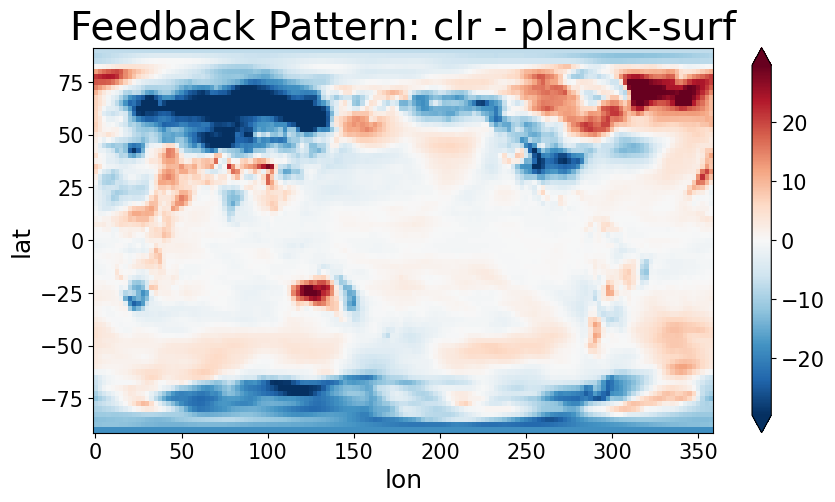

In [12]:
slope, stderr = fb_pattern[('clr', 'planck-surf')]

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
slope.plot(cmap="RdBu_r", robust=True)
plt.title("Feedback Pattern: clr - planck-surf")
plt.show()

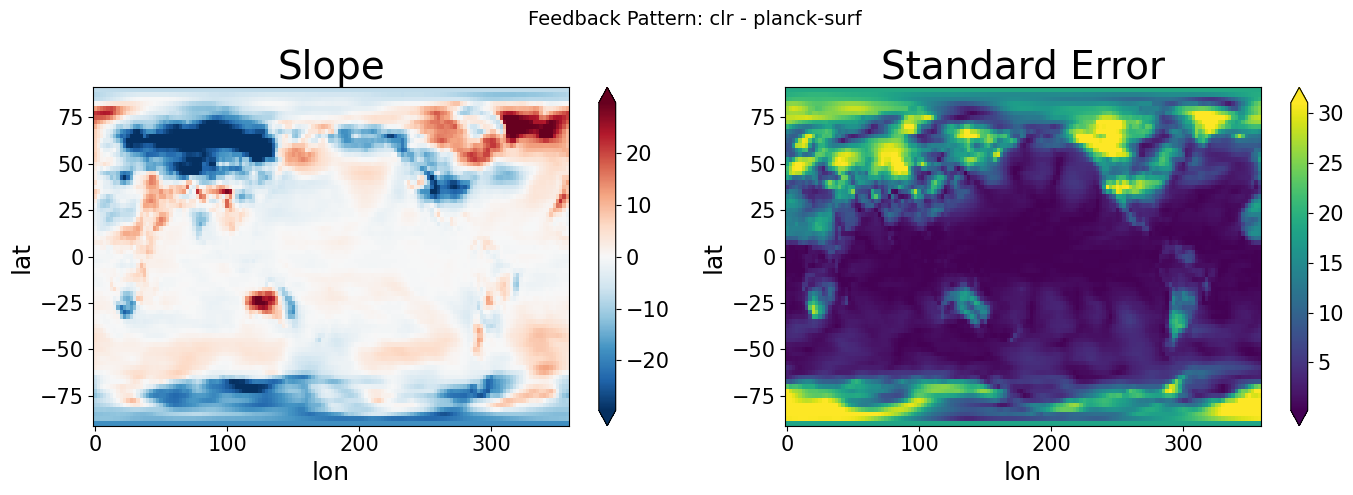

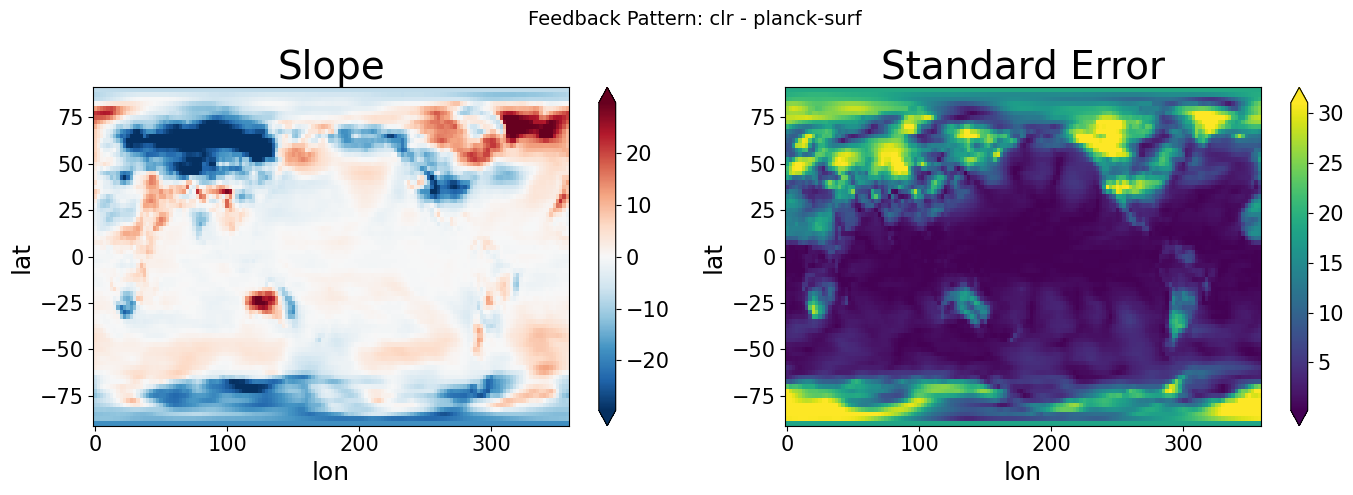

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

slope.plot(ax=axes[0], cmap="RdBu_r", robust=True)
axes[0].set_title("Slope")

stderr.plot(ax=axes[1], cmap="viridis", robust=True)
axes[1].set_title("Standard Error")

fig.suptitle("Feedback Pattern: clr - planck-surf", fontsize=14)
plt.tight_layout()
plt.show()

In [7]:
fb_cloud = sfc.feedback_cloud_wrapper(config, kernel, standard_dict)

Kernel upload...
Dataset to analyze upload...


/work/users/malbanese/miniforge/envs/spectfbcalc/lib/python3.11/site-packages/dask/array/core.py:5039: PerformanceWarning: Increasing number of chunks by factor of 512
  result = blockwise(
/work/users/malbanese/miniforge/envs/spectfbcalc/lib/python3.11/site-packages/dask/array/core.py:5039: PerformanceWarning: Increasing number of chunks by factor of 512
  result = blockwise(
/work/users/malbanese/miniforge/envs/spectfbcalc/lib/python3.11/site-packages/dask/array/core.py:5039: PerformanceWarning: Increasing number of chunks by factor of 512
  result = blockwise(


Check that the files in config have the necessary variables.
Standard variable names: ['rsus', 'rsds', 'time', 'lat', 'lon', 'plev', 'ps', 'ts', 'tas', 'ta', 'hus', 'rlut', 'rsut', 'rlutcs', 'rsutcs']
Variables automatically renamed: {'q': 'hus', 'sp': 'ps', 'ssrd': 'rsds', 't': 'ta', 'tsr': 'rsut', 'tsrc': 'rsutcs', 'ttr': 'rlut', 'ttrc': 'rlutcs'}
Not recognized variables that were not renamed: ['ci', 'cp', 'e', 'ewss', 'lnsp', 'lsp', 'msl', 'nsss', 'pme', 'r', 'ro', 'sd', 'sf', 'slhf', 'snr', 'sshf', 'ssr', 'ssrc', 'str', 'strc', 'strd', 'tcc', 'tciw', 'tclw', 'tcwv', 'tds', 'tnr', 'totp', 'u', 'uas', 'v', 'vas', 'z']
Variables in dataset after renaming: ['time', 'lon', 'lat', 'ci', 'cp', 'e', 'ewss', 'plev', 'lnsp', 'lsp', 'msl', 'nsss', 'pme', 'hus', 'r', 'ro', 'sd', 'sf', 'slhf', 'snr', 'ps', 'sshf', 'ssr', 'ssrc', 'rsds', 'str', 'strc', 'strd', 'ta', 'tas', 'tcc', 'tciw', 'tclw', 'tcwv', 'tds', 'tnr', 'totp', 'rsut', 'rsutcs', 'rlut', 'rlutcs', 'u', 'uas', 'v', 'vas', 'z']
Varia

/work/users/malbanese/miniforge/envs/spectfbcalc/lib/python3.11/site-packages/dask/array/core.py:5039: PerformanceWarning: Increasing number of chunks by factor of 512
  result = blockwise(
/work/users/malbanese/miniforge/envs/spectfbcalc/lib/python3.11/site-packages/dask/array/core.py:5039: PerformanceWarning: Increasing number of chunks by factor of 512
  result = blockwise(
/work/users/malbanese/miniforge/envs/spectfbcalc/lib/python3.11/site-packages/dask/array/core.py:5039: PerformanceWarning: Increasing number of chunks by factor of 512
  result = blockwise(


Check that specified files in config have the necessary variables.
Standard variable names: ['rsus', 'rsds', 'time', 'lat', 'lon', 'plev', 'ps', 'ts', 'tas', 'ta', 'hus', 'rlut', 'rsut', 'rlutcs', 'rsutcs']
Variables automatically renamed: {'q': 'hus', 'sp': 'ps', 'ssrd': 'rsds', 't': 'ta', 'tsr': 'rsut', 'tsrc': 'rsutcs', 'ttr': 'rlut', 'ttrc': 'rlutcs'}
Not recognized variables that were not renamed: ['ci', 'cp', 'e', 'ewss', 'lnsp', 'lsp', 'msl', 'nsss', 'pme', 'r', 'ro', 'sd', 'sf', 'slhf', 'snr', 'sshf', 'ssr', 'ssrc', 'str', 'strc', 'strd', 'tcc', 'tciw', 'tclw', 'tcwv', 'tds', 'tnr', 'totp', 'u', 'uas', 'v', 'vas', 'z']
Variables in dataset after renaming: ['time', 'lon', 'lat', 'ci', 'cp', 'e', 'ewss', 'plev', 'lnsp', 'lsp', 'msl', 'nsss', 'pme', 'hus', 'r', 'ro', 'sd', 'sf', 'slhf', 'snr', 'ps', 'sshf', 'ssr', 'ssrc', 'rsds', 'str', 'strc', 'strd', 'ta', 'tas', 'tcc', 'tciw', 'tclw', 'tcwv', 'tds', 'tnr', 'totp', 'rsut', 'rsutcs', 'rlut', 'rlutcs', 'u', 'uas', 'v', 'vas', 'z']

/work/users/malbanese/miniforge/envs/spectfbcalc/lib/python3.11/site-packages/dask/array/core.py:5039: PerformanceWarning: Increasing number of chunks by factor of 512
  result = blockwise(
/work/users/malbanese/miniforge/envs/spectfbcalc/lib/python3.11/site-packages/dask/array/core.py:5039: PerformanceWarning: Increasing number of chunks by factor of 512
  result = blockwise(
/work/users/malbanese/miniforge/envs/spectfbcalc/lib/python3.11/site-packages/dask/array/core.py:5039: PerformanceWarning: Increasing number of chunks by factor of 512
  result = blockwise(


Check that specified files in config have the necessary variables.
Standard variable names: ['rsus', 'rsds', 'time', 'lat', 'lon', 'plev', 'ps', 'ts', 'tas', 'ta', 'hus', 'rlut', 'rsut', 'rlutcs', 'rsutcs']
Variables automatically renamed: {'q': 'hus', 'sp': 'ps', 'ssrd': 'rsds', 't': 'ta', 'tsr': 'rsut', 'tsrc': 'rsutcs', 'ttr': 'rlut', 'ttrc': 'rlutcs'}
Not recognized variables that were not renamed: ['ci', 'cp', 'e', 'ewss', 'lnsp', 'lsp', 'msl', 'nsss', 'pme', 'r', 'ro', 'sd', 'sf', 'slhf', 'snr', 'sshf', 'ssr', 'ssrc', 'str', 'strc', 'strd', 'tcc', 'tciw', 'tclw', 'tcwv', 'tds', 'tnr', 'totp', 'u', 'uas', 'v', 'vas', 'z']
Variables in dataset after renaming: ['time', 'lon', 'lat', 'ci', 'cp', 'e', 'ewss', 'plev', 'lnsp', 'lsp', 'msl', 'nsss', 'pme', 'hus', 'r', 'ro', 'sd', 'sf', 'slhf', 'snr', 'ps', 'sshf', 'ssr', 'ssrc', 'rsds', 'str', 'strc', 'strd', 'ta', 'tas', 'tcc', 'tciw', 'tclw', 'tcwv', 'tds', 'tnr', 'totp', 'rsut', 'rsutcs', 'rlut', 'rlutcs', 'u', 'uas', 'v', 'vas', 'z']

In [ ]:
%matplotlib inline

import xarray as xr

ds_path = "/work/users/malbanese/slope_fit/data/tunecs/pic9/monthly/tas/*.nc"
ds = xr.open_mfdataset(ds_path, combine='by_coords')  # open the files as one Dataset

# Now you can proceed
ds['tas'].mean(dim=['lat', 'lon']).plot()

import numpy as np

weights = np.cos(np.deg2rad(ds['lat']))
gtas = ds['tas'].weighted(weights).mean(dim=['lat', 'lon'])
gtas.plot()